In [28]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, multilabel_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd

# %matplotlib inline

In [29]:
iris_database = load_iris()
# print("iris_database: \n", iris_database)
print("type(iris_database) =", type(iris_database))
print("iris_database.data.shape =", iris_database.data.shape)


type(iris_database) = <class 'sklearn.utils.Bunch'>
iris_database.data.shape = (150, 4)


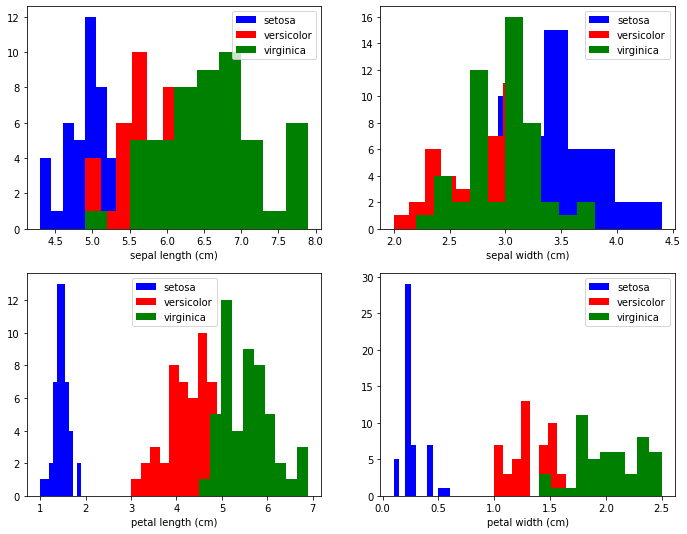

In [30]:

colors = ["blue", "red", "green"]
for feature in range(iris_database.data.shape[1]):
  plt.subplots_adjust(left=0.1, bottom=0.1, right=1.6, top=1.8)
  plt.subplot(2, 2, feature + 1)
  for label, color in zip(range(len(iris_database.target_names)), colors):
    # Subset data by the specific y, and draw histogram of an X column
    plt.hist(iris_database.data[iris_database.target==label, feature], 
             label=iris_database.target_names[label],
             color=color)
    plt.xlabel(iris_database.feature_names[feature])
    plt.legend()
plt.show()

In [31]:
df_iris = pd.DataFrame(iris_database.data, columns=iris_database["feature_names"])
df_iris["target"] = iris_database["target"]
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
   iris_database.data, iris_database["target"], test_size = 0.3, random_state = None
)

In [33]:
classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(X_train, y_train)

y_pred = classifier_knn.predict(X_test)
# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# Providing sample data and the model will make prediction out of that data



Accuracy: 1.0


In [34]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = multilabel_confusion_matrix(y_test, y_pred)
print("\n multilabel CM:\n", result1, "\n=================\n\n")

Confusion Matrix:
[[ 9  0  0]
 [ 0 18  0]
 [ 0  0 18]]

 multilabel CM:
 [[[36  0]
  [ 0  9]]

 [[27  0]
  [ 0 18]]

 [[27  0]
  [ 0 18]]] 




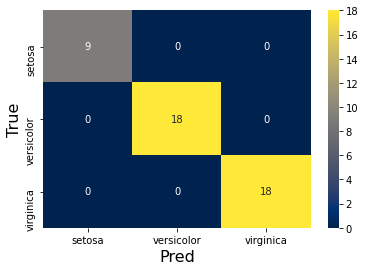

In [35]:
import seaborn as sns
ticks = ['setosa', 'versicolor', 'virginica']

sns.heatmap(result, annot=True, xticklabels=ticks, yticklabels=ticks,cmap='cividis')
plt.xlabel("Pred", fontdict={"size": 16})
plt.ylabel("True", fontdict={"size": 16})
plt.show()

In [36]:
result1 = classification_report(y_test, y_pred)
print(" Classification Report:\n", result1, )

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [37]:
# Precision = TP/(TP + FP)
# Precision – Accuracy of positive predictions.
# For class 0
# TP0 = 14
# FP0 = 0 + 0 = 0

# precision0 = TP0/(TP0 + FP0) = 14 / 14 = 1

# For class 1
# TP1 = 
# FP1 = 

# precision1 = TP1/(TP1 + FP1) = 0.9474

# precision2 = TP2/(TP2 + FP2) = 12 / (12 + 1) = 0.9231  

In [38]:
# Recall: Fraction of positives that were correctly identified.
# Recall = TP/(TP+FN)

In [39]:
# F1 score – What percent of positive predictions were correct? 
# F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [40]:
# The support is the number of occurence of the given class in your dataset.

In [41]:
sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = classifier_knn.predict(sample)
print("raw preds =", preds)
pred_species = [iris_database.target_names[p] for p in preds] 
print("Predictions:", pred_species)

raw preds = [0 1]
Predictions: ['setosa', 'versicolor']
